<a href="https://colab.research.google.com/github/Vianneydsouza/Applied-Statistics/blob/main/Unsupervised_Learning_Project_Vianney_Dsouza.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Project Done using Goggle Colab

##Part A

###1. Data Understanding & Exploration

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# reading car name csv and assigning it to a variable
data = pd.read_csv('/content/drive/MyDrive/python/CSV/Car name.csv')
data.head(10)

,car_name
0,chevrolet chevelle malibu
1,buick skylark 320
2,plymouth satellite
3,amc rebel sst
4,ford torino
5,ford galaxie 500
6,chevrolet impala
7,plymouth fury iii
8,pontiac catalina
9,amc ambassador dpl


In [ ]:
# reading car - attributes. Json and assigning it to a variable
data2 = pd.read_json('/content/drive/MyDrive/python/CSV/Car-Attributes.json')
data2.head(10)

,mpg,cyl,disp,hp,wt,acc,yr,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1
5,15.0,8,429.0,198,4341,10.0,70,1
6,14.0,8,454.0,220,4354,9.0,70,1
7,14.0,8,440.0,215,4312,8.5,70,1
8,14.0,8,455.0,225,4425,10.0,70,1
9,15.0,8,390.0,190,3850,8.5,70,1


In [ ]:
#merging both the dataframes using concat
df = pd.concat([data, data2], axis=1)
df.head(10)

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
1,buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
2,plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
3,amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
4,ford torino,17.0,8,302.0,140,3449,10.5,70,1
5,ford galaxie 500,15.0,8,429.0,198,4341,10.0,70,1
6,chevrolet impala,14.0,8,454.0,220,4354,9.0,70,1
7,plymouth fury iii,14.0,8,440.0,215,4312,8.5,70,1
8,pontiac catalina,14.0,8,455.0,225,4425,10.0,70,1
9,amc ambassador dpl,15.0,8,390.0,190,3850,8.5,70,1


In [ ]:
df.info() #checking data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   car_name  398 non-null    object 
 1   mpg       398 non-null    float64
 2   cyl       398 non-null    int64  
 3   disp      398 non-null    float64
 4   hp        398 non-null    object 
 5   wt        398 non-null    int64  
 6   acc       398 non-null    float64
 7   yr        398 non-null    int64  
 8   origin    398 non-null    int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [ ]:
#checking 5 point summarry
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cyl,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
disp,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
wt,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acc,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
yr,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
origin,398.0,1.572864,0.802055,1.0,1.000,1.0,2.000,3.0


###2. Data Preparation & Analysis

In [ ]:
df.head()

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
1,buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
2,plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
3,amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
4,ford torino,17.0,8,302.0,140,3449,10.5,70,1


In [ ]:
df.shape #checking columns and rows

(398, 9)

In [ ]:
df.nunique() #checking number of unique values present

car_name    305
mpg         129
cyl           5
disp         82
hp           94
wt          351
acc          95
yr           13
origin        3
dtype: int64

In [ ]:
# checking missing values percentage
null_values_percentage = df.isnull().sum()*100/len(df)
print(null_values_percentage)

car_name    0.0
mpg         0.0
cyl         0.0
disp        0.0
hp          0.0
wt          0.0
acc         0.0
yr          0.0
origin      0.0
dtype: float64


In [ ]:
df.isnull().value_counts() #checking values

car_name  mpg    cyl    disp   hp     wt     acc    yr     origin
False     False  False  False  False  False  False  False  False     398
Name: count, dtype: int64

In [ ]:
#checking unique/unexpected values if any
for col in df.columns:
  print(col, ':\n', df[col].unique())

car_name :
 ['chevrolet chevelle malibu' 'buick skylark 320' 'plymouth satellite'
 'amc rebel sst' 'ford torino' 'ford galaxie 500' 'chevrolet impala'
 'plymouth fury iii' 'pontiac catalina' 'amc ambassador dpl'
 'dodge challenger se' "plymouth 'cuda 340" 'chevrolet monte carlo'
 'buick estate wagon (sw)' 'toyota corona mark ii' 'plymouth duster'
 'amc hornet' 'ford maverick' 'datsun pl510'
 'volkswagen 1131 deluxe sedan' 'peugeot 504' 'audi 100 ls' 'saab 99e'
 'bmw 2002' 'amc gremlin' 'ford f250' 'chevy c20' 'dodge d200' 'hi 1200d'
 'chevrolet vega 2300' 'toyota corona' 'ford pinto'
 'plymouth satellite custom' 'ford torino 500' 'amc matador'
 'pontiac catalina brougham' 'dodge monaco (sw)'
 'ford country squire (sw)' 'pontiac safari (sw)'
 'amc hornet sportabout (sw)' 'chevrolet vega (sw)' 'pontiac firebird'
 'ford mustang' 'mercury capri 2000' 'opel 1900' 'peugeot 304' 'fiat 124b'
 'toyota corolla 1200' 'datsun 1200' 'volkswagen model 111'
 'plymouth cricket' 'toyota corona hardtop'

We can see in hp we have something like this '?'. So we need to take care of these values

In [ ]:
df.info() #because of hp has '?' we have hp as object rather than int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   car_name  398 non-null    object 
 1   mpg       398 non-null    float64
 2   cyl       398 non-null    int64  
 3   disp      398 non-null    float64
 4   hp        398 non-null    object 
 5   wt        398 non-null    int64  
 6   acc       398 non-null    float64
 7   yr        398 non-null    int64  
 8   origin    398 non-null    int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [ ]:
df['hp']=df['hp'].replace('?', np.nan) #replacing '?' with Nan

In [ ]:
for col in df.columns:
  print(col, ':\n', df[col].unique()) #re-checking if its fixed

car_name :
 ['chevrolet chevelle malibu' 'buick skylark 320' 'plymouth satellite'
 'amc rebel sst' 'ford torino' 'ford galaxie 500' 'chevrolet impala'
 'plymouth fury iii' 'pontiac catalina' 'amc ambassador dpl'
 'dodge challenger se' "plymouth 'cuda 340" 'chevrolet monte carlo'
 'buick estate wagon (sw)' 'toyota corona mark ii' 'plymouth duster'
 'amc hornet' 'ford maverick' 'datsun pl510'
 'volkswagen 1131 deluxe sedan' 'peugeot 504' 'audi 100 ls' 'saab 99e'
 'bmw 2002' 'amc gremlin' 'ford f250' 'chevy c20' 'dodge d200' 'hi 1200d'
 'chevrolet vega 2300' 'toyota corona' 'ford pinto'
 'plymouth satellite custom' 'ford torino 500' 'amc matador'
 'pontiac catalina brougham' 'dodge monaco (sw)'
 'ford country squire (sw)' 'pontiac safari (sw)'
 'amc hornet sportabout (sw)' 'chevrolet vega (sw)' 'pontiac firebird'
 'ford mustang' 'mercury capri 2000' 'opel 1900' 'peugeot 304' 'fiat 124b'
 'toyota corolla 1200' 'datsun 1200' 'volkswagen model 111'
 'plymouth cricket' 'toyota corona hardtop'

Looks like '?' is fixed

In [ ]:
df['hp'].isnull().sum() #checking in hp wether there is Nan values

6

In [ ]:
df.loc[df['hp'].isnull()==True] #checking the rows where the Nan values are present

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin
32,ford pinto,25.0,4,98.0,NaN,2046,19.0,71,1
126,ford maverick,21.0,6,200.0,NaN,2875,17.0,74,1
330,renault lecar deluxe,40.9,4,85.0,NaN,1835,17.3,80,2
336,ford mustang cobra,23.6,4,140.0,NaN,2905,14.3,80,1
354,renault 18i,34.5,4,100.0,NaN,2320,15.8,81,2
374,amc concord dl,23.0,4,151.0,NaN,3035,20.5,82,1


In [ ]:
df_dropped = df.dropna(subset=['hp']) #since we have just 6 rows there shouldn't be any issue to drop this rows

In [ ]:
df_dropped['hp'].isnull().sum() #checking if they are dropped

0

In [ ]:
df_dropped.loc[df_dropped['hp'].isnull()==True] #checikng rows if they are any more nan values present

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin


In [ ]:
df_dropped.head() #checking the first 5 rows

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,1
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,1
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,1
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,1
4,ford torino,17.0,8,302.0,140.0,3449,10.5,70,1


In [ ]:
df = df_dropped.copy() #copying into new database

In [ ]:
df['hp'] = df['hp'].astype(int) #hp has dtype as object changging it to int64

In [ ]:
df.info() #checking data types

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   car_name  392 non-null    object 
 1   mpg       392 non-null    float64
 2   cyl       392 non-null    int64  
 3   disp      392 non-null    float64
 4   hp        392 non-null    int64  
 5   wt        392 non-null    int64  
 6   acc       392 non-null    float64
 7   yr        392 non-null    int64  
 8   origin    392 non-null    int64  
dtypes: float64(3), int64(5), object(1)
memory usage: 30.6+ KB


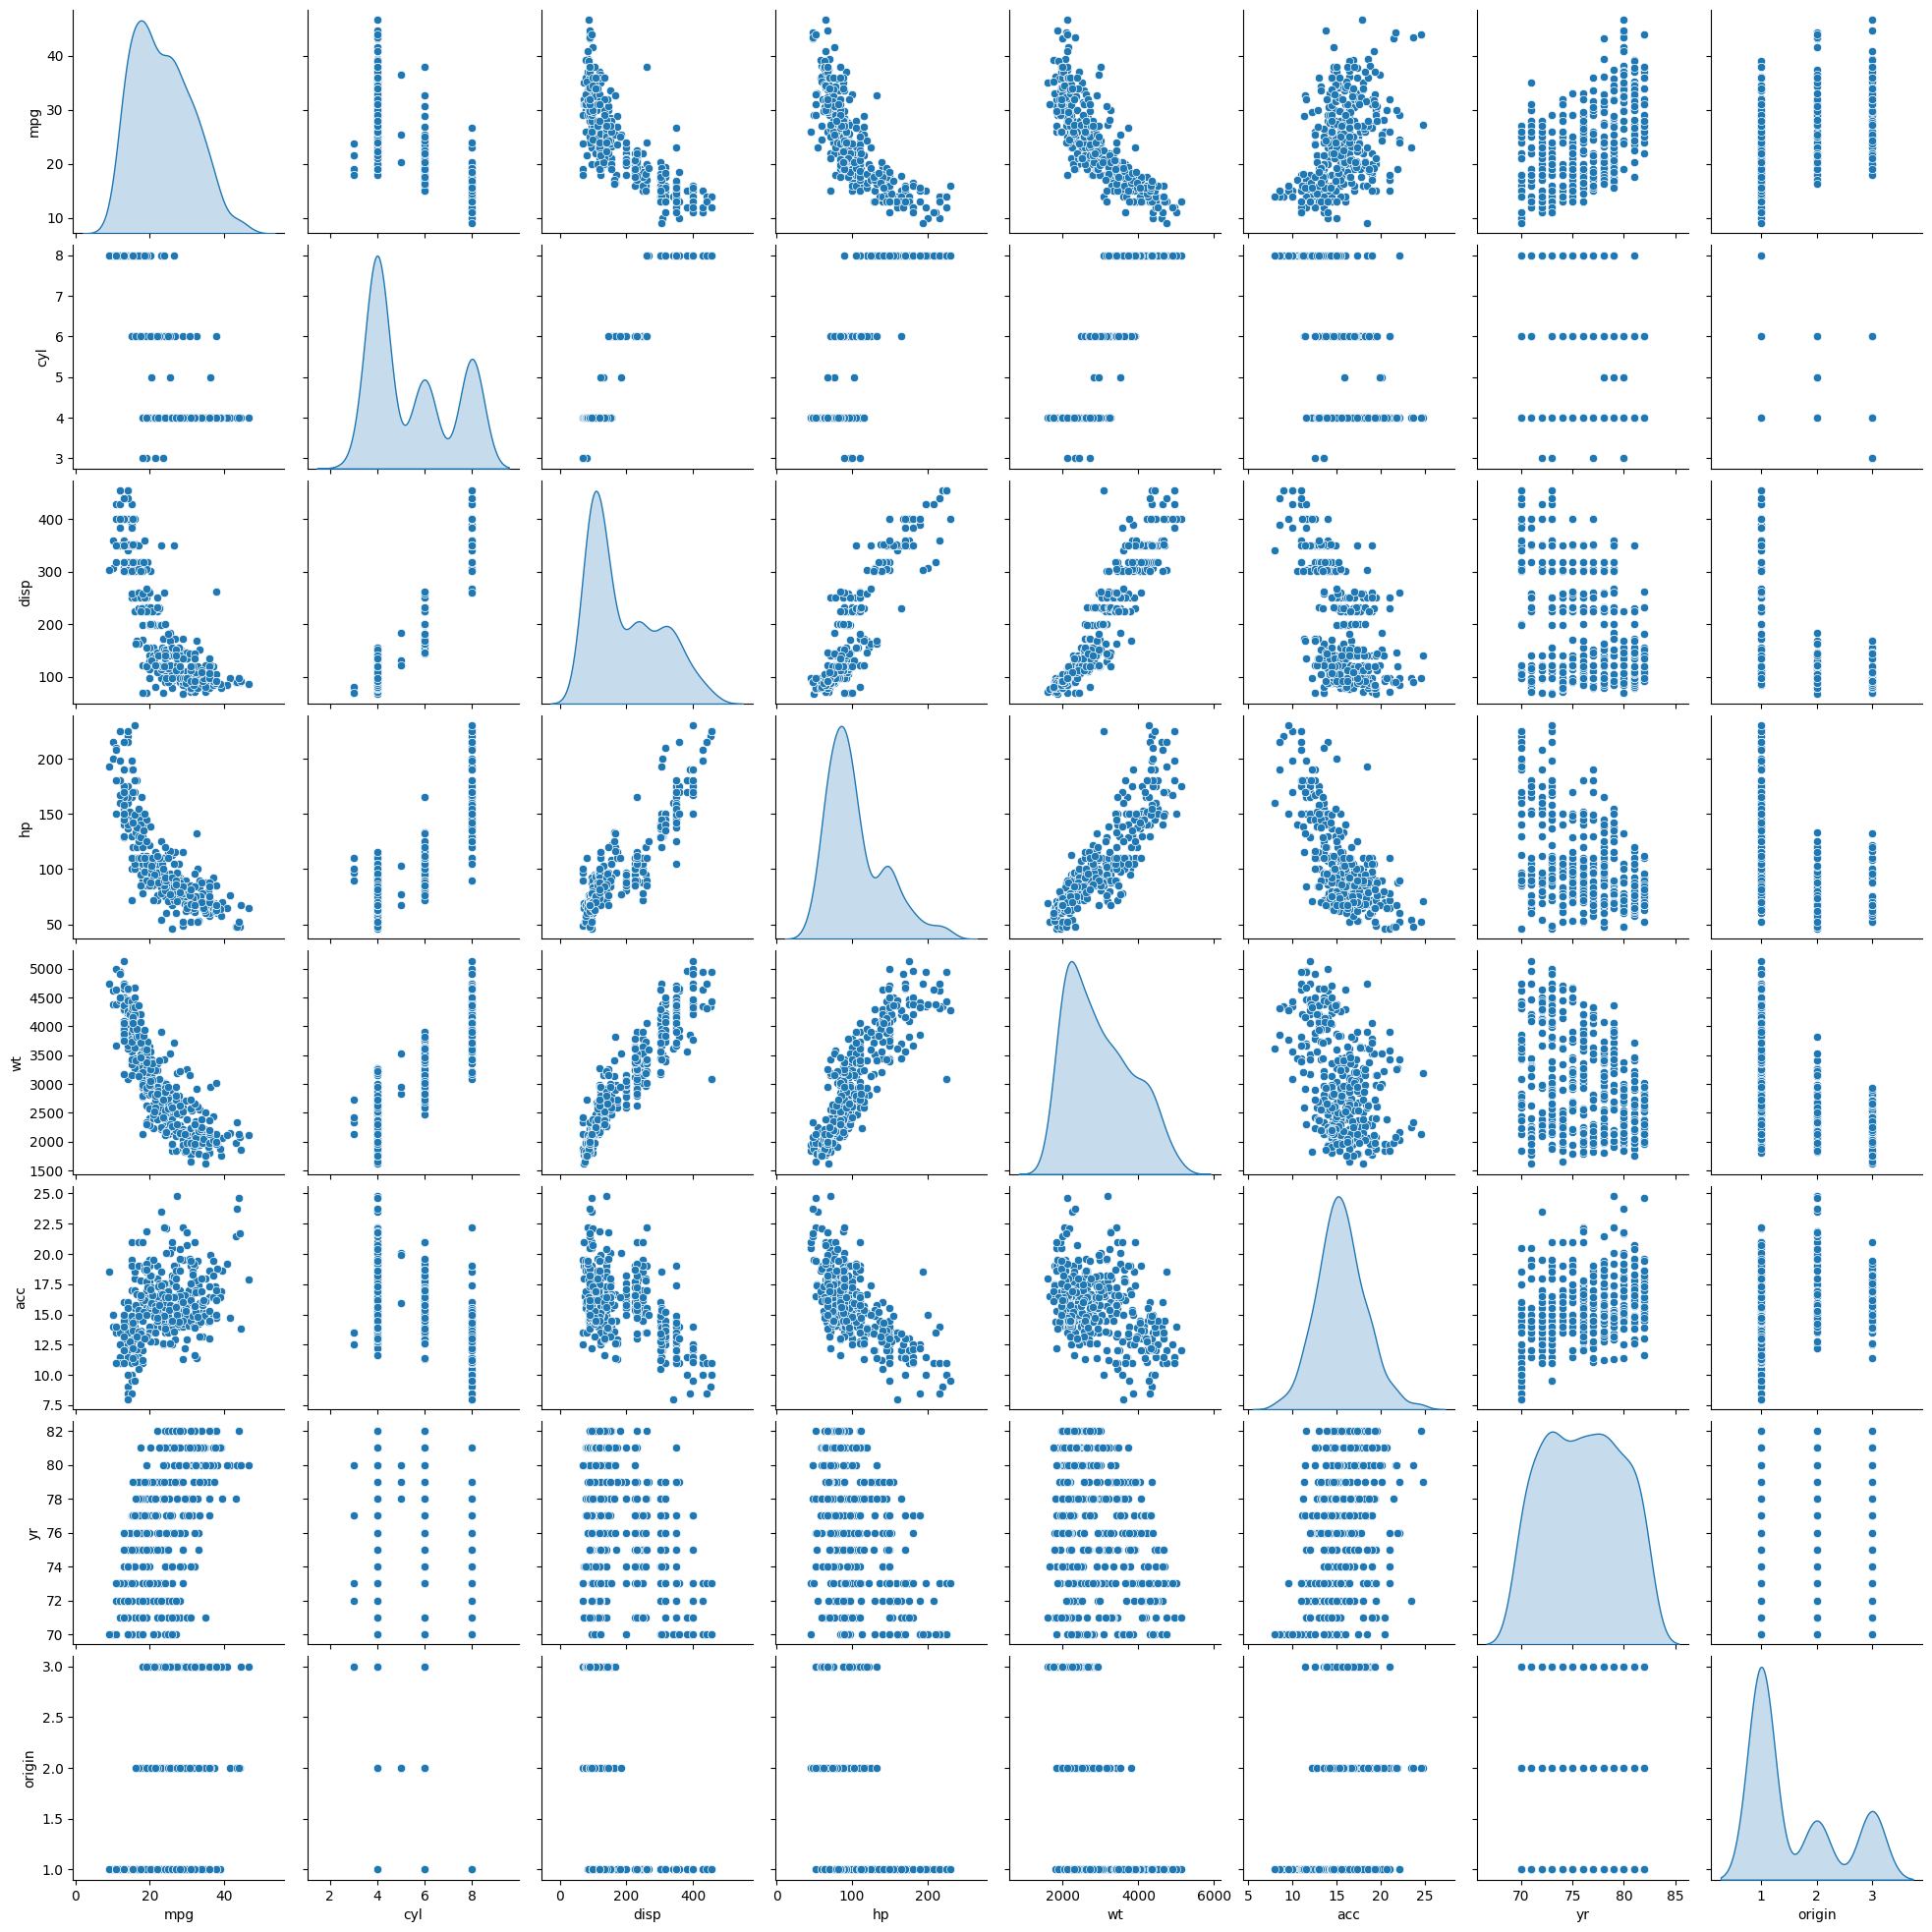

In [ ]:
sns.pairplot(df, diag_kind='kde') #plotting pair plot

Text(0.5, 1.0, 'Weight vs Displacement')

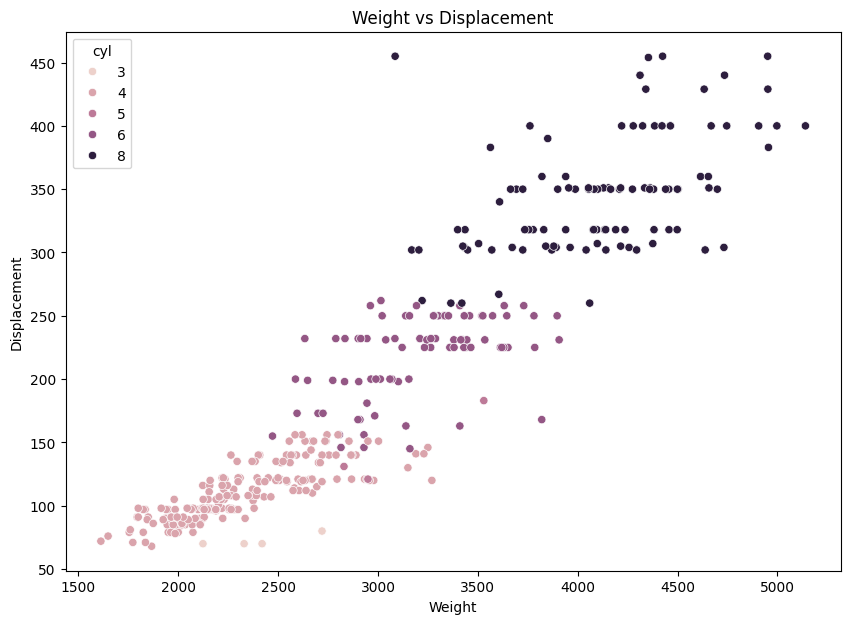

In [ ]:
plt.figure(figsize=(10,7)) #plotting scatter plot for weignt and displacement
sns.scatterplot(df, x='wt', y='disp', hue='cyl')
plt.xlabel('Weight')
plt.ylabel('Displacement')
plt.title('Weight vs Displacement')

 Here we can see, there is a positive correlation between the number of cylinders (cyl) and both weight (wt) and displacement (disp). This means that as the weight or displacement of a car increases, the number of cylinders tends to increase as well.

The correlation is particularly strong between displacement and the number of cylinders. Heavier cars generally require more powerful engines, which often have larger displacements and more cylinders to generate the necessary power.

Text(0.5, 1.0, 'Weight vs MPG')

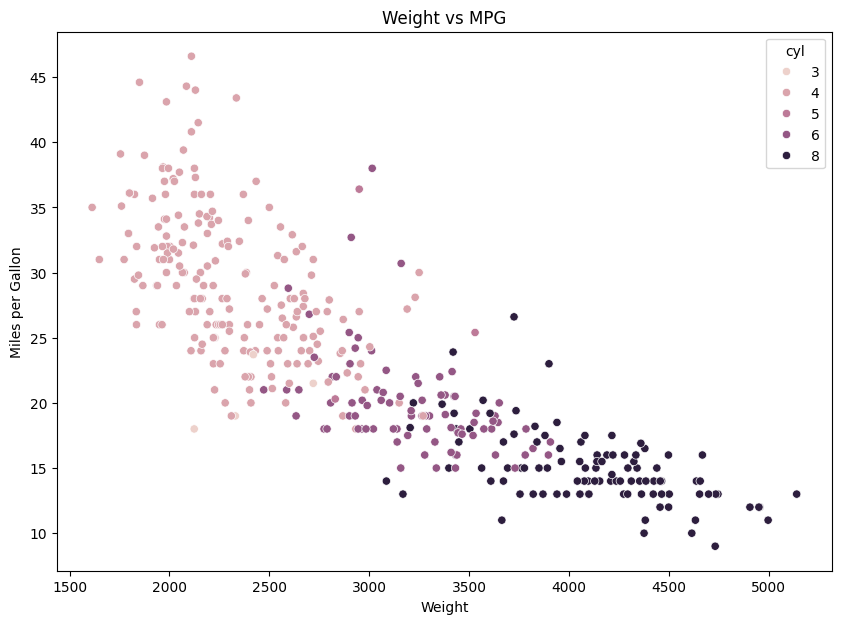

In [ ]:
plt.figure(figsize=(10,7)) #plotting scatter plot for weight and miles per gallon
sns.scatterplot(df, x='wt', y='mpg', hue='cyl')
plt.xlabel('Weight')
plt.ylabel('Miles per Gallon')
plt.title('Weight vs MPG')

Here we can see its completely opposite in case of displacement and weight. Here we can see the lighter the weight the more miles per gallon, and ultimately less cylinders required. We can see a negative corelation between weight and mpg.

###3. Clustering

####A. Apply K-Means clustering for 2 to 10 clusters.

In [ ]:
from sklearn.cluster import KMeans #importing kmeans model

In [ ]:
X = df.drop(columns=['car_name']) #dropping car name column

In [ ]:
cluster_range = range(2,11) #range of clusters

In [ ]:
inertia_values = [] #list to store inertia values
for i in cluster_range:
  kmeans = KMeans(n_clusters=i, random_state=42)
  kmeans.fit(X)
  inertia_values.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

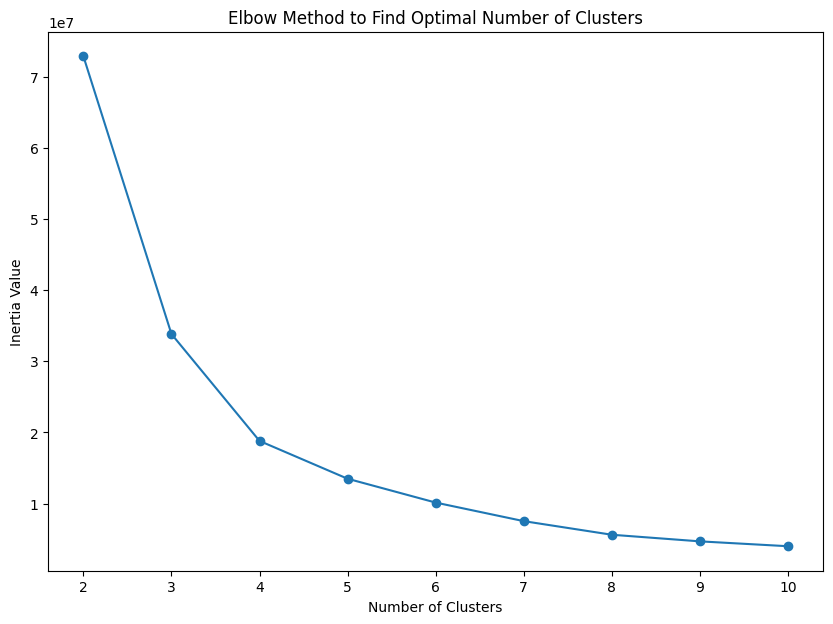

In [ ]:
# plotting the elbow method to visualize the optimal num of clusters
plt.figure(figsize=(10,7))
plt.plot(cluster_range, inertia_values, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia Value')
plt.title('Elbow Method to Find Optimal Number of Clusters')
plt.show()

In [ ]:
optimal_num_clusters = 3 # setting optimal number clusters which is 3
kmeans = KMeans(n_clusters=optimal_num_clusters, random_state=42)
kmeans.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [ ]:
df['cluster'] = kmeans.labels_ #adding cluster column

In [ ]:
df.head() #checking the first 5 rows

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin,cluster
0,chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1,2
1,buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1,0
2,plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1,2
3,amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1,2
4,ford torino,17.0,8,302.0,140,3449,10.5,70,1,2


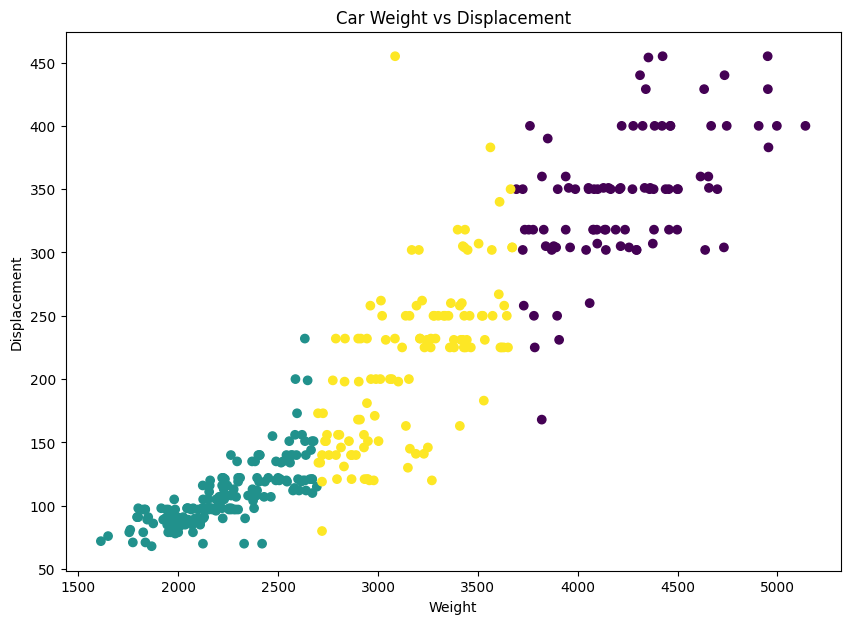

In [ ]:
plt.figure(figsize=(10,7)) #plotting scatter plot for weight and displacement
plt.scatter(df['wt'], df['disp'], c=df['cluster'], cmap='viridis')
plt.xlabel('Weight')
plt.ylabel('Displacement')
plt.title('Car Weight vs Displacement')
plt.show()

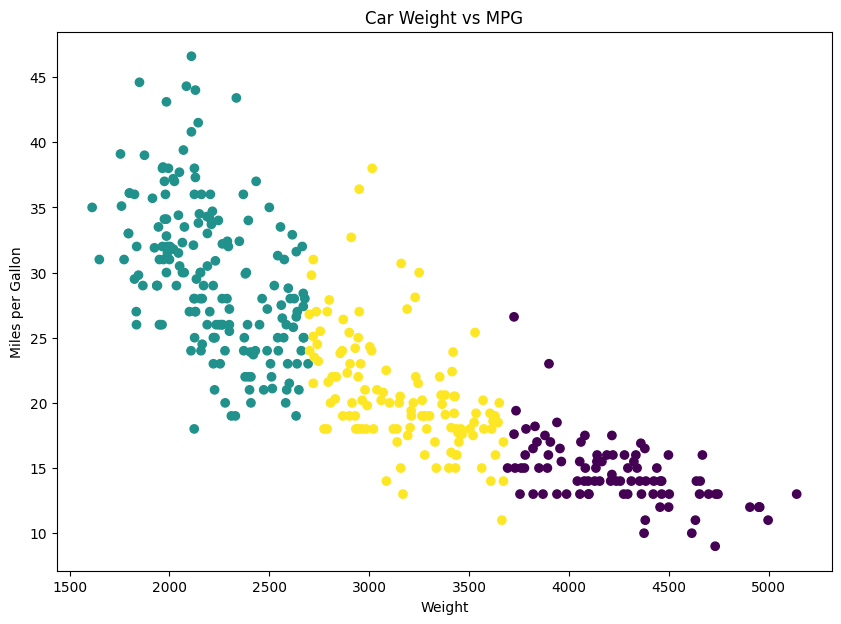

In [ ]:
plt.figure(figsize=(10,7)) #plotting scatter plot for weight and miles per gallon
plt.scatter(df['wt'], df['mpg'], c=df['cluster'], cmap='viridis')
plt.xlabel('Weight')
plt.ylabel('Miles per Gallon')
plt.title('Car Weight vs MPG')
plt.show()

Lets first try to create a new car with the below attributes:
mpg = 27
cyl = 6
disp = 160
hp = 105
wt = 3000
acc = 16
yr = 77
origin = 1

In [ ]:
df.head(10)

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin,cluster
0,chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1,2
1,buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1,0
2,plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1,2
3,amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1,2
4,ford torino,17.0,8,302.0,140,3449,10.5,70,1,2
5,ford galaxie 500,15.0,8,429.0,198,4341,10.0,70,1,0
6,chevrolet impala,14.0,8,454.0,220,4354,9.0,70,1,0
7,plymouth fury iii,14.0,8,440.0,215,4312,8.5,70,1,0
8,pontiac catalina,14.0,8,455.0,225,4425,10.0,70,1,0
9,amc ambassador dpl,15.0,8,390.0,190,3850,8.5,70,1,0


In [ ]:
!pip install pyspark #installing pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 1.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488491 sha256=0eb8ab04303c3068522ad44610f0b6971b9dd37fcb99f0d3a068415bd1ac326b
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark


In [ ]:
from pyspark.sql import SparkSession, Row #importing spark session
from pyspark.ml.clustering import KMeans #importing kmeans model
from pyspark.ml.feature import VectorAssembler #importing vector assembler model

In [ ]:
spark = SparkSession.builder.getOrCreate() #creating spark session
spark_df = spark.createDataFrame(df)

In [ ]:
input_columns = ['mpg', 'cyl', 'disp', 'hp', 'wt', 'acc', 'yr', 'origin'] #list of columns to be used for clustering
spark_data = spark_df.select(*input_columns)

In [ ]:
assembler = VectorAssembler(inputCols=input_columns, outputCol='features')
assembled_data = assembler.transform(spark_data)

In [ ]:
optimal_k = 3
kmeans = KMeans().setK(optimal_k).setSeed(1) #creating kmeans model
kmeans_model = kmeans.fit(assembled_data)

In [ ]:
new_car_data = spark.createDataFrame([Row(mpg=27, cyl=6, disp=160, hp=105, wt=3000, acc=16, yr=77, origin=1)])

In [ ]:
new_car_data_assembled = assembler.transform(new_car_data)

In [ ]:
predictions = kmeans_model.transform(new_car_data_assembled)

In [ ]:
predicted_cluster = predictions.select('prediction').collect()[0][0]
print('The New Car Belongs to Cluster:', predicted_cluster)

The New Car Belongs to Cluster: 1


##Part B

###1. Data Understanding & Cleaning

In [5]:
veh = pd.read_csv('/content/drive/MyDrive/python/CSV/vehicle.csv')
veh.head(10) #checking first 10 rows

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus
5,107,NaN,106.0,172.0,50.0,6,255.0,26.0,28.0,169,280.0,957.0,264.0,85.0,5.0,9.0,181.0,183,bus
6,97,43.0,73.0,173.0,65.0,6,153.0,42.0,19.0,143,176.0,361.0,172.0,66.0,13.0,1.0,200.0,204,bus
7,90,43.0,66.0,157.0,65.0,9,137.0,48.0,18.0,146,162.0,281.0,164.0,67.0,3.0,3.0,193.0,202,van
8,86,34.0,62.0,140.0,61.0,7,122.0,54.0,17.0,127,141.0,223.0,112.0,64.0,2.0,14.0,200.0,208,van
9,93,44.0,98.0,NaN,62.0,11,183.0,36.0,22.0,146,202.0,505.0,152.0,64.0,4.0,14.0,195.0,204,car


In [6]:
veh.shape

(846, 19)

In [7]:
veh.info() #checking data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  841 non-null    float64
 2   distance_circularity         842 non-null    float64
 3   radius_ratio                 840 non-null    float64
 4   pr.axis_aspect_ratio         844 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                845 non-null    float64
 7   elongatedness                845 non-null    float64
 8   pr.axis_rectangularity       843 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              843 non-null    float64
 11  scaled_variance.1            844 non-null    float64
 12  scaled_radius_of_gyration    844 non-null    float64
 13  scaled_radius_of_gyr

In [8]:
#checking percentage of missing values
null_values_percentage = veh.isnull().sum()*100/len(veh)
print(null_values_percentage)

compactness                    0.000000
circularity                    0.591017
distance_circularity           0.472813
radius_ratio                   0.709220
pr.axis_aspect_ratio           0.236407
max.length_aspect_ratio        0.000000
scatter_ratio                  0.118203
elongatedness                  0.118203
pr.axis_rectangularity         0.354610
max.length_rectangularity      0.000000
scaled_variance                0.354610
scaled_variance.1              0.236407
scaled_radius_of_gyration      0.236407
scaled_radius_of_gyration.1    0.472813
skewness_about                 0.709220
skewness_about.1               0.118203
skewness_about.2               0.118203
hollows_ratio                  0.000000
class                          0.000000
dtype: float64


In [9]:
veh.isnull().sum() #checking values

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [10]:
veh.nunique() #checking unique values

compactness                     44
circularity                     27
distance_circularity            63
radius_ratio                   134
pr.axis_aspect_ratio            37
max.length_aspect_ratio         21
scatter_ratio                  131
elongatedness                   35
pr.axis_rectangularity          13
max.length_rectangularity       66
scaled_variance                128
scaled_variance.1              422
scaled_radius_of_gyration      143
scaled_radius_of_gyration.1     39
skewness_about                  23
skewness_about.1                41
skewness_about.2                30
hollows_ratio                   31
class                            3
dtype: int64

In [11]:
for col in veh.columns:
  print(col, ':\n', veh[col].unique()) #checking unique values

compactness :
 [ 95  91 104  93  85 107  97  90  86  88  89  94  96  99 101  84  87  83
 102  80 100  82 106  81 119  78  92  98 103  77  73  79 110 108 109 111
 105 112 116 113 117 115  76 114]
circularity :
 [48. 41. 50. 44. nan 43. 34. 36. 46. 42. 49. 55. 54. 56. 47. 37. 39. 53.
 45. 38. 35. 40. 59. 52. 51. 58. 57. 33.]
distance_circularity :
 [ 83.  84. 106.  82.  70.  73.  66.  62.  98.  74.  85.  79. 103.  51.
  77. 100.  75.  53.  64. 105.  80.  54.  63. 107.  nan  72.  86.  68.
 104.  87.  76.  81.  71. 101.  96.  78. 108.  91.  89.  94.  92.  60.
  57.  65.  50.  88. 109.  95.  90.  58.  69.  47.  40.  59. 110.  93.
 102. 112.  61.  42.  49.  44.  52.  55.]
radius_ratio :
 [178. 141. 209. 159. 205. 172. 173. 157. 140.  nan 143. 136. 171. 144.
 203. 201. 109. 197. 186. 215. 153. 121. 148. 219. 154. 119. 193. 129.
 160. 151. 222. 177. 118. 306. 176. 169. 214. 105. 137. 183. 220. 145.
 133. 122. 147. 115. 174. 228. 175. 185. 195. 221. 212. 135. 120. 156.
 125. 164. 161. 227. 191.

In [12]:
veh[veh.isnull().any(axis=1)] #checking rows where there is nan values

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
5,107,NaN,106.0,172.0,50.0,6,255.0,26.0,28.0,169,280.0,957.0,264.0,85.0,5.0,9.0,181.0,183,bus
9,93,44.0,98.0,NaN,62.0,11,183.0,36.0,22.0,146,202.0,505.0,152.0,64.0,4.0,14.0,195.0,204,car
19,101,56.0,100.0,215.0,NaN,10,208.0,32.0,24.0,169,227.0,651.0,223.0,74.0,6.0,5.0,186.0,193,car
35,100,46.0,NaN,172.0,67.0,9,157.0,43.0,20.0,150,170.0,363.0,184.0,67.0,17.0,7.0,192.0,200,van
66,81,43.0,68.0,125.0,57.0,8,149.0,46.0,19.0,146,169.0,323.0,172.0,NaN,NaN,18.0,179.0,184,bus
70,96,55.0,98.0,161.0,54.0,10,215.0,31.0,NaN,175,226.0,683.0,221.0,76.0,3.0,6.0,185.0,193,car
77,86,40.0,62.0,140.0,62.0,7,150.0,45.0,19.0,133,165.0,330.0,173.0,NaN,2.0,3.0,180.0,185,car
78,104,52.0,94.0,NaN,66.0,5,208.0,31.0,24.0,161,227.0,666.0,218.0,76.0,11.0,4.0,193.0,191,bus
105,108,NaN,103.0,202.0,64.0,10,220.0,30.0,25.0,168,NaN,711.0,214.0,73.0,11.0,NaN,188.0,199,car
118,85,NaN,NaN,128.0,56.0,8,150.0,46.0,19.0,144,168.0,324.0,173.0,82.0,9.0,14.0,180.0,184,bus


In [13]:
veh.isnull().any(axis=1).sum() #checking nan values

33

In [14]:
veh.describe(include='all').T #checking summary

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
compactness,846.0,NaN,NaN,NaN,93.678487,8.234474,73.0,87.0,93.0,100.0,119.0
circularity,841.0,NaN,NaN,NaN,44.828775,6.152172,33.0,40.0,44.0,49.0,59.0
distance_circularity,842.0,NaN,NaN,NaN,82.110451,15.778292,40.0,70.0,80.0,98.0,112.0
radius_ratio,840.0,NaN,NaN,NaN,168.888095,33.520198,104.0,141.0,167.0,195.0,333.0
pr.axis_aspect_ratio,844.0,NaN,NaN,NaN,61.67891,7.891463,47.0,57.0,61.0,65.0,138.0
max.length_aspect_ratio,846.0,NaN,NaN,NaN,8.567376,4.601217,2.0,7.0,8.0,10.0,55.0
scatter_ratio,845.0,NaN,NaN,NaN,168.901775,33.214848,112.0,147.0,157.0,198.0,265.0
elongatedness,845.0,NaN,NaN,NaN,40.933728,7.816186,26.0,33.0,43.0,46.0,61.0
pr.axis_rectangularity,843.0,NaN,NaN,NaN,20.582444,2.592933,17.0,19.0,20.0,23.0,29.0
max.length_rectangularity,846.0,NaN,NaN,NaN,147.998818,14.515652,118.0,137.0,146.0,159.0,188.0


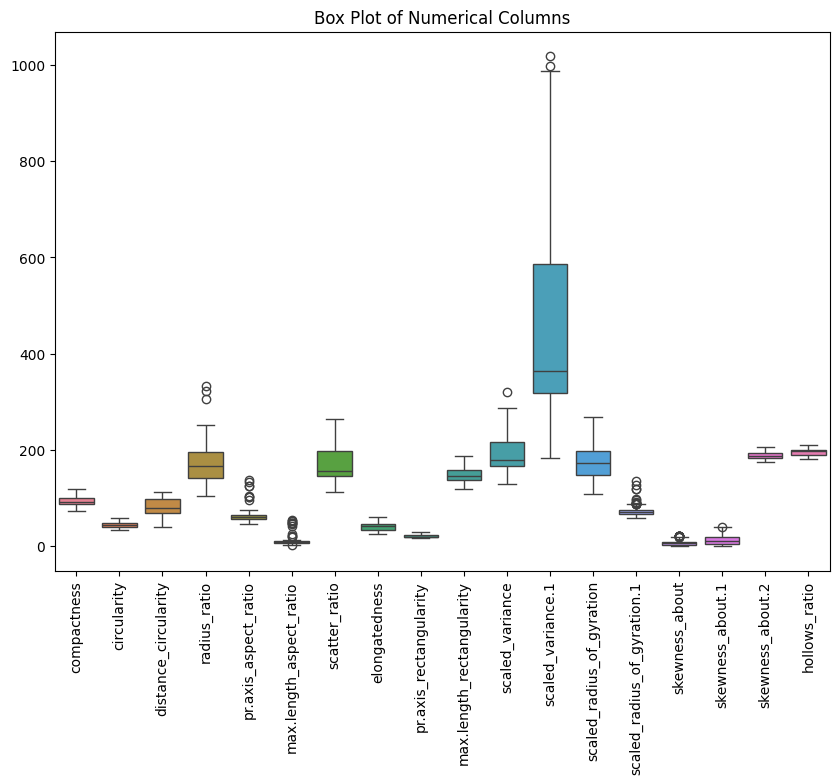

In [15]:
plt.figure(figsize=(10,7)) #plotting box plot for numerical columns
sns.boxplot(veh)
plt.title('Box Plot of Numerical Columns')
plt.xticks(rotation=90);

In [16]:
nan_cols = veh.columns[veh.isnull().any()].tolist() #checking columns where there is nan values
print(nan_cols)

['circularity', 'distance_circularity', 'radius_ratio', 'pr.axis_aspect_ratio', 'scatter_ratio', 'elongatedness', 'pr.axis_rectangularity', 'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration', 'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1', 'skewness_about.2']


In [17]:
columns_to_impute = ['circularity', 'distance_circularity', 'radius_ratio', 'pr.axis_aspect_ratio', 'scatter_ratio', 'elongatedness', 'pr.axis_rectangularity', 'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration', 'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1', 'skewness_about.2']

In [18]:
for col in columns_to_impute:
  veh[col] = veh[col].fillna(veh[col].mean()) #imputing missing values with mean

In [19]:
nan_cols = veh.columns[veh.isnull().any()].tolist() #checking columns where there is nan values
print(nan_cols)

[]


In [20]:
veh.isnull().sum() #checking nan values

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

In [21]:
veh.describe().T #checking summary

,count,mean,std,min,25%,50%,75%,max
compactness,846.0,93.678487,8.234474,73.0,87.00,93.0,100.00,119.0
circularity,846.0,44.828775,6.133943,33.0,40.00,44.0,49.00,59.0
distance_circularity,846.0,82.110451,15.740902,40.0,70.00,80.0,98.00,112.0
radius_ratio,846.0,168.888095,33.400979,104.0,141.00,168.0,195.00,333.0
pr.axis_aspect_ratio,846.0,61.678910,7.882119,47.0,57.00,61.0,65.00,138.0
max.length_aspect_ratio,846.0,8.567376,4.601217,2.0,7.00,8.0,10.00,55.0
scatter_ratio,846.0,168.901775,33.195188,112.0,147.00,157.0,198.00,265.0
elongatedness,846.0,40.933728,7.811559,26.0,33.00,43.0,46.00,61.0
pr.axis_rectangularity,846.0,20.582444,2.588326,17.0,19.00,20.0,23.00,29.0
max.length_rectangularity,846.0,147.998818,14.515652,118.0,137.00,146.0,159.00,188.0


In [22]:
null_values_percentage = veh.isnull().sum()*100/len(veh)
print(null_values_percentage) #checking percentage of missing values

compactness                    0.0
circularity                    0.0
distance_circularity           0.0
radius_ratio                   0.0
pr.axis_aspect_ratio           0.0
max.length_aspect_ratio        0.0
scatter_ratio                  0.0
elongatedness                  0.0
pr.axis_rectangularity         0.0
max.length_rectangularity      0.0
scaled_variance                0.0
scaled_variance.1              0.0
scaled_radius_of_gyration      0.0
scaled_radius_of_gyration.1    0.0
skewness_about                 0.0
skewness_about.1               0.0
skewness_about.2               0.0
hollows_ratio                  0.0
class                          0.0
dtype: float64


So now we have imouted all the missing values with mean.

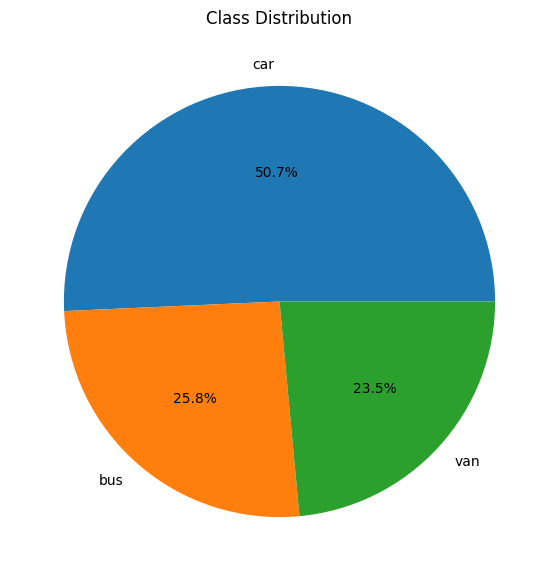

In [23]:
plt.figure(figsize=(10,7)) #plotting pie chart for class
plt.pie(veh['class'].value_counts(), labels=veh['class'].value_counts().index, autopct='%1.1f%%')
plt.title('Class Distribution')
plt.show();

In [24]:
duplicate_rows = veh.duplicated().sum()
print(duplicate_rows)

0


In [25]:
duplicated_rows = veh[veh.duplicated()]
print(duplicated_rows)

Empty DataFrame
Columns: [compactness, circularity, distance_circularity, radius_ratio, pr.axis_aspect_ratio, max.length_aspect_ratio, scatter_ratio, elongatedness, pr.axis_rectangularity, max.length_rectangularity, scaled_variance, scaled_variance.1, scaled_radius_of_gyration, scaled_radius_of_gyration.1, skewness_about, skewness_about.1, skewness_about.2, hollows_ratio, class]
Index: []


Looks like there are no duplicated rows

###2. Data Preparation

In [26]:
from sklearn.model_selection import train_test_split #importing train test split model
from sklearn.preprocessing import StandardScaler #importing standard scaler model

In [27]:
X = veh.drop(columns=['class']) #dropping class column

y = veh['class'] #assigning class column to y

In [28]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=42) #splitting data into train and test

In [29]:
scaler = StandardScaler() #creating scaler model
train_X = scaler.fit_transform(train_X) #fitting and transforming train data
test_X = scaler.transform(test_X) #transforming test data

###3. Model Building

In [32]:
from sklearn import svm #importing svm model
from sklearn import metrics #importing metrics model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report #importing accuracy score, confusion matrix and classification report

In [31]:
model = svm.SVC(kernel='linear') #creating svm model
model.fit(train_X, train_y) #fitting the model

SVC(kernel='linear')

In [34]:
pred_y = model.predict(test_X) #predicting test data

In [35]:
accuracy_score = accuracy_score(test_y, pred_y) #calculating accuracy score
precision_score = metrics.precision_score(test_y, pred_y, average='weighted') #calculating precision score
recall_score = metrics.recall_score(test_y, pred_y, average='weighted') #calculating recall score
f1_score = metrics.f1_score(test_y, pred_y, average='weighted') #calculating f1 score
confusion_matrix = metrics.confusion_matrix(test_y, pred_y) #calculating confusion matrix
classification_report = metrics.classification_report(test_y, pred_y) #calculating classification report

In [36]:
print(f'Accuracy Score: {accuracy_score}')
print(f'Precision Score: {precision_score}')
print(f'Recall Score: {recall_score}')
print(f'F1 Score: {f1_score}')
print(f'Confusion Matrix:\n{confusion_matrix}')
print(f'Classification Report:\n{classification_report}')

Accuracy Score: 0.9409448818897638
Precision Score: 0.9416594493277161
Recall Score: 0.9409448818897638
F1 Score: 0.9410229089188556
Confusion Matrix:
[[ 73   2   3]
 [  6 110   2]
 [  0   2  56]]
Classification Report:
              precision    recall  f1-score   support

         bus       0.92      0.94      0.93        78
         car       0.96      0.93      0.95       118
         van       0.92      0.97      0.94        58

    accuracy                           0.94       254
   macro avg       0.94      0.94      0.94       254
weighted avg       0.94      0.94      0.94       254



In [37]:
pred_train_y = model.predict(train_X) #predicting train data

In [39]:
train_precision_score = metrics.precision_score(train_y, pred_train_y, average='weighted') #calculating train precision score
train_recall_score = metrics.recall_score(train_y, pred_train_y, average='weighted') #calculating train recall score
f1_score = metrics.f1_score(train_y, pred_train_y, average='weighted') #calculating train f1 score
confusion_matrix = metrics.confusion_matrix(train_y, pred_train_y) #calculating train confusion matrix
classification_report = metrics.classification_report(train_y, pred_train_y) #calculating train classification report

In [40]:
print(f'Train Precision Score: {train_precision_score}')
print(f'Train Recall Score: {train_recall_score}')
print(f'Train F1 Score: {f1_score}')
print(f'Train Confusion Matrix:\n{confusion_matrix}')
print(f'Train Classification Report:\n{classification_report}')

Train Precision Score: 0.964653683493421
Train Recall Score: 0.964527027027027
Train F1 Score: 0.964573826571939
Train Confusion Matrix:
[[133   6   1]
 [  7 301   3]
 [  2   2 137]]
Train Classification Report:
              precision    recall  f1-score   support

         bus       0.94      0.95      0.94       140
         car       0.97      0.97      0.97       311
         van       0.97      0.97      0.97       141

    accuracy                           0.96       592
   macro avg       0.96      0.96      0.96       592
weighted avg       0.96      0.96      0.96       592



In [41]:
from sklearn.decomposition import PCA #importing PCA Model

In [42]:
pca = PCA(n_components=10) #creating PCA model
pca.fit(train_X) #fitting PCA model

PCA(n_components=10)

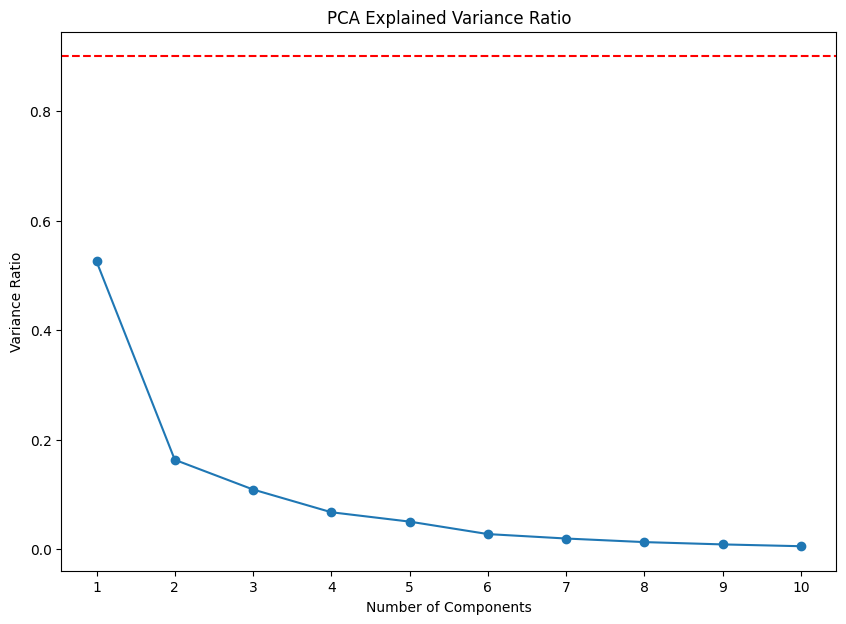

In [53]:
plt.figure(figsize=(10,7)) #plotting PCA plot
plt.plot(range(1,11), pca.explained_variance_ratio_, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Variance Ratio')
plt.xticks(range(1,11))
plt.axhline(y=0.9, color='r', linestyle='--')
plt.title('PCA Explained Variance Ratio')
plt.show()

In [54]:
pca = PCA(n_components=0.9) #creating PCA model
pca.fit(train_X)

PCA(n_components=0.9)

In [55]:
n_components = pca.n_components_ #getting number of components

data_pca = pca.transform(train_X) #transforming data

In [56]:
print(f'Number of Components: {n_components}')
print(f'Data Shape: {data_pca.shape}')

Number of Components: 5
Data Shape: (592, 5)


In [57]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(data_pca, train_y, test_size=0.3, random_state=42) #splitting data into train and test

In [58]:
model = svm.SVC(kernel='linear') #creating svm model
model.fit(X_train_pca, y_train_pca) #fitting the model

SVC(kernel='linear')

In [59]:
y_pred_pca = model.predict(X_test_pca) #predicting test data

In [68]:
precision_score = metrics.precision_score(y_test_pca, y_pred_pca, average='weighted') #calculating precision score
recall_score = metrics.recall_score(y_test_pca, y_pred_pca, average='weighted') #calculating recall score
f1_score = metrics.f1_score(y_test_pca, y_pred_pca, average='weighted') #calculating f1 score
confusion_matrix = metrics.confusion_matrix(y_test_pca, y_pred_pca) #calculating confusion matrix
classification_report = metrics.classification_report(y_test_pca, y_pred_pca) #calculating classification report

In [69]:
print(f'Precision Score: {precision_score}')
print(f'Recall Score: {recall_score}')
print(f'F1 Score: {f1_score}')
print(f'Confusion Matrix:\n{confusion_matrix}')
print(f'Classification Report:\n{classification_report}')

Precision Score: 0.7009498185968773
Recall Score: 0.7078651685393258
F1 Score: 0.7026269294984605
Confusion Matrix:
[[25 10  6]
 [ 5 78 10]
 [ 7 14 23]]
Classification Report:
              precision    recall  f1-score   support

         bus       0.68      0.61      0.64        41
         car       0.76      0.84      0.80        93
         van       0.59      0.52      0.55        44

    accuracy                           0.71       178
   macro avg       0.68      0.66      0.67       178
weighted avg       0.70      0.71      0.70       178



In [70]:
y_train_pca = model.predict(X_train_pca) #predicting train data

In [72]:
precision_score = metrics.precision_score(y_train_pca, y_train_pca, average='weighted') #calculating precision score
recall_score = metrics.recall_score(y_train_pca, y_train_pca, average='weighted') #calculating recall score
f1_score = metrics.f1_score(y_train_pca, y_train_pca, average='weighted') #calculating f1 score
confusion_matrix = metrics.confusion_matrix(y_train_pca, y_train_pca) #calculating confusion matrix
classification_report = metrics.classification_report(y_train_pca, y_train_pca) #calculating classification report

In [73]:
print(f'Precision Score: {precision_score}')
print(f'Recall Score: {recall_score}')
print(f'F1 Score: {f1_score}')
print(f'Confusion Matrix:\n{confusion_matrix}')
print(f'Classification Report:\n{classification_report}')

Precision Score: 1.0
Recall Score: 1.0
F1 Score: 1.0
Confusion Matrix:
[[ 84   0   0]
 [  0 246   0]
 [  0   0  84]]
Classification Report:
              precision    recall  f1-score   support

         bus       1.00      1.00      1.00        84
         car       1.00      1.00      1.00       246
         van       1.00      1.00      1.00        84

    accuracy                           1.00       414
   macro avg       1.00      1.00      1.00       414
weighted avg       1.00      1.00      1.00       414



Looks like my model is clearly overfitting the data, which neeeds to be addreseed

###4. Performance Improvement

In [74]:
from sklearn.model_selection import GridSearchCV #importing grid search cv model

In [75]:
svm_model = svm.SVC() #creating svm model

In [76]:
param_grid = {'C': [0.1,1,10,100], 'kernel': ['linear', 'rbf'], 'gamma': [0.001,0.01,0.1,1]} #creating parameter grid

In [77]:
grid_search = GridSearchCV(svm_model, param_grid, cv=5) #creating grid search cv model
grid_search.fit(train_X, train_y)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1],
                         'kernel': ['linear', 'rbf']})

In [78]:
best_model = grid_search.best_estimator_ #getting best model

In [79]:
y_pred = best_model.predict(test_X) #predicting test data

In [88]:
classification_report = metrics.classification_report(test_y, y_pred)
confusion_matrix = metrics.confusion_matrix(test_y, y_pred)

In [89]:
print(f'Classification Report:\n{classification_report}')
print(f'Confusion Matrix:\n{confusion_matrix}')

Classification Report:
              precision    recall  f1-score   support

         bus       1.00      0.95      0.97        78
         car       0.97      1.00      0.98       118
         van       0.97      0.97      0.97        58

    accuracy                           0.98       254
   macro avg       0.98      0.97      0.97       254
weighted avg       0.98      0.98      0.98       254

Confusion Matrix:
[[ 74   2   2]
 [  0 118   0]
 [  0   2  56]]


In [90]:
y_pred_train = best_model.predict(train_X)

In [91]:
classification_report = metrics.classification_report(train_y, y_pred_train)
confusion_matrix = metrics.confusion_matrix(train_y, y_pred_train)

In [92]:
print(f'Classification Report:\n{classification_report}')
print(f'Confusion Matrix:\n{confusion_matrix}')

Classification Report:
              precision    recall  f1-score   support

         bus       0.99      0.99      0.99       140
         car       1.00      0.99      1.00       311
         van       0.99      0.99      0.99       141

    accuracy                           0.99       592
   macro avg       0.99      0.99      0.99       592
weighted avg       0.99      0.99      0.99       592

Confusion Matrix:
[[139   0   1]
 [  1 309   1]
 [  1   0 140]]


Key Improvements After Grid Search

Higher Accuracy:

Testing: Accuracy increased from 71% to 98%, a significant improvement.
 Training: Accuracy increased slightly from 99% to 99%, showing a small gain.
Better Precision and Recall:

Testing: Precision and recall improved for all classes, especially for "bus" and "van." This means the model is making fewer false positives (misclassifying other vehicles as the target class) and fewer false negatives (missing actual instances of the target class).
 Training: Precision and recall remained at a perfect 100%, indicating the model continues to fit the training data exceptionally well.
Improved F1-Score:

Testing: F1-score increased for all classes, reflecting the better balance between precision and recall.
 Training: F1-score remained perfect at 1.00.
Confusion Matrix (Testing):

The matrix after grid search shows far fewer misclassifications. Almost all instances are correctly classified, with only a few errors for "bus" and "van." This indicates the model has learned to generalize better to unseen data.

###5. Data Understanding & Cleaning

A. Explain pre-requisite/assumptions of PCA

Ans: The Prerequisite for PCA includes Machine Learning fundamentals and feature space. Linear algebra and statistics

Principal compoent analysis is a method to identify the patterns in data using their similarities and dissimilarities between the sample points.

B. Explain advantages and limitations of PCA

Ans: Advantages of PCA:
1. Removes the correlated attributes.
2. Help to reduce overfitting.
3. Improves the data visualization.
4. It also help to improve the performance of Algorithm.

Disadvantages of PCA:
1. Data normalization must be needed before applying PCA
2. Some level of information loss.
3. Independent variables are becoming less interpretable